# Naive Ba  on CIFAR-10

## Imports

In [115]:
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from time import time as runtime
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
stdout = sys.stdout
sys.stdout = open('/dev/null', 'w')
sys.stdout = stdout
from sklearn import metrics
import pickle
from time import time as runtime
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import random
%matplotlib inline

## Loading Data & printing shapes

In [116]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("trainig data shape  : ",x_train.shape)
print("trainig labels shape: ",y_train.shape)

print("testing data shape  : ",x_test.shape)
print("testing labels shape: ",y_test.shape)


trainig data shape  :  (50000, 32, 32, 3)
trainig labels shape:  (50000, 1)
testing data shape  :  (10000, 32, 32, 3)
testing labels shape:  (10000, 1)


## Data exploration
First data visualisation without any pre-processing on it.
Printing 10 first images from the training set. 

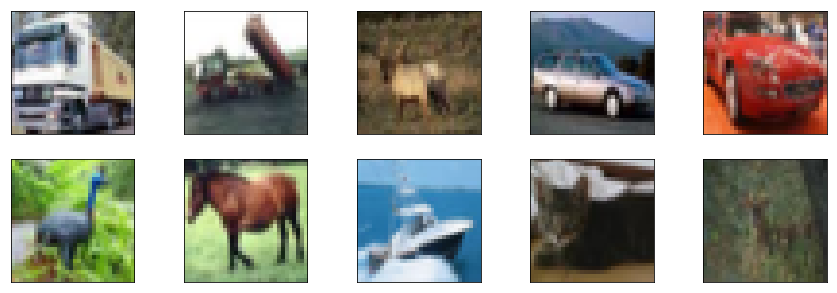

In [117]:
figure1 = plt.figure(figsize=(15,5))
for i in range(1,11):
    images = figure1.add_subplot(2, 5, i , xticks=[], yticks=[])
    images.imshow(np.squeeze(x_train[i]))

## Data normalization

In [118]:
x_train = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255

## Data reshaping

In [119]:
ten = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train.reshape((50000, 3072))
y_train1 = list(y_train.flatten())
x_test = x_test.reshape((10000, 3072))
y_test1 = list(y_test.flatten())


print("[after reshaping]")
print("trainig   data shape  : ",x_train.shape ,x_train.shape[0], 'examples')
print("testing   data shape  : ",x_test.shape,x_test.shape[0], 'examples')


[after reshaping]
trainig   data shape  :  (50000, 3072) 50000 examples
testing   data shape  :  (10000, 3072) 10000 examples


# PCA

In [120]:
t = runtime()
pca = PCA(n_components=45)
pca.fit(x_train)
print("training PCA on training set takes: %.1f" % (runtime()-t))
t = runtime()
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print("Transforming training & testing set takes: %.1f" % (runtime()-t))

training PCA on training set takes: 6.9
Transforming training & testing set takes: 0.9


In [121]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Gaussian Naive Bayes

             precision    recall  f1-score   support

   airplane       0.43      0.36      0.40      1000
 automobile       0.41      0.38      0.39      1000
       bird       0.19      0.09      0.12      1000
        cat       0.28      0.20      0.24      1000
       deer       0.29      0.53      0.37      1000
        dog       0.37      0.28      0.32      1000
       frog       0.35      0.50      0.41      1000
      horse       0.37      0.32      0.34      1000
       ship       0.46      0.45      0.45      1000
      truck       0.38      0.45      0.41      1000

avg / total       0.35      0.36      0.35     10000



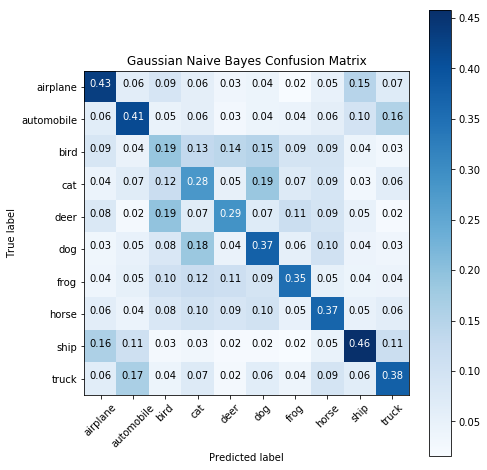

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
y_pred1 = gnb.fit(x_train, y_train1).predict(x_test)


import itertools  
from sklearn.metrics import confusion_matrix
print(classification_report(y_test1, y_pred1, target_names=ten))
conf_matrix = confusion_matrix(y_pred1, y_test1)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=ten, normalize=True, 
                      title='Gaussian Naive Bayes Confusion Matrix')


# Multinomial Naive bayes 

             precision    recall  f1-score   support

   airplane       0.26      0.39      0.32      1000
 automobile       0.25      0.23      0.24      1000
       bird       0.22      0.15      0.18      1000
        cat       0.22      0.16      0.18      1000
       deer       0.22      0.10      0.13      1000
        dog       0.24      0.18      0.21      1000
       frog       0.22      0.30      0.26      1000
      horse       0.23      0.28      0.26      1000
       ship       0.29      0.25      0.27      1000
      truck       0.18      0.29      0.23      1000

avg / total       0.23      0.23      0.23     10000



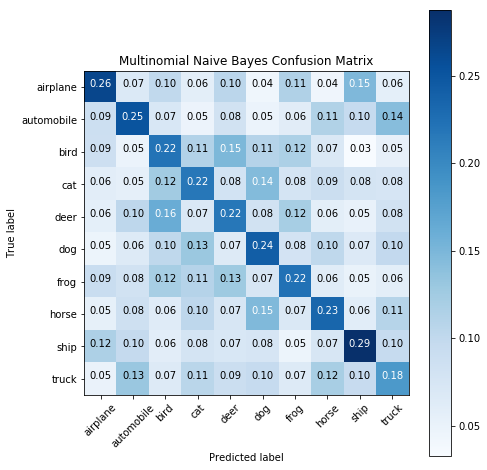

In [123]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
y_pred1=mnb.fit(abs(x_train), y_train1).predict(abs(x_test))
print(classification_report(y_test1, y_pred1, target_names=ten))

conf_matrix = confusion_matrix(y_pred1, y_test1)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=ten, normalize=True, 
                      title='Multinomial Naive Bayes Confusion Matrix')

# Bernoulli Naive Bayes

Accuracy 0.3009
             precision    recall  f1-score   support

   airplane       0.33      0.33      0.33      1000
 automobile       0.31      0.35      0.33      1000
       bird       0.24      0.19      0.21      1000
        cat       0.22      0.16      0.18      1000
       deer       0.29      0.25      0.27      1000
        dog       0.28      0.28      0.28      1000
       frog       0.28      0.34      0.31      1000
      horse       0.29      0.28      0.29      1000
       ship       0.36      0.43      0.39      1000
      truck       0.34      0.41      0.37      1000

avg / total       0.30      0.30      0.30     10000



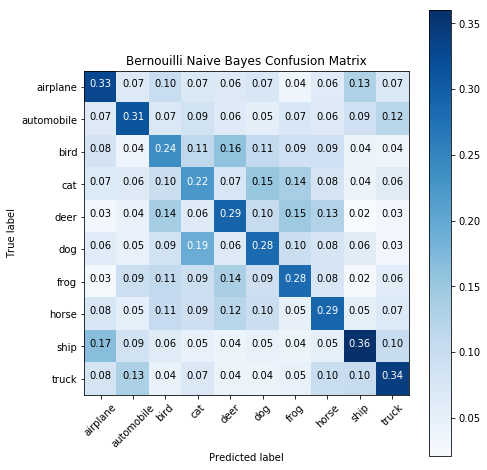

In [124]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()
y_pred1=bnb.fit(x_train, y_train1).predict(x_test)
print("Accuracy",sum(y_test1 == y_pred1)/10000)
print(classification_report(y_test1, y_pred1, target_names=ten))
conf_matrix = confusion_matrix(y_pred1, y_test1)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=ten, normalize=True, 
                      title='Bernouilli Naive Bayes Confusion Matrix')